### Load in Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('bank_data_C.csv')

In [2]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [3]:
df.tail()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1041609,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1041610,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1041611,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1041612,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1041613,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


### Data Cleaning/Preperation

In [5]:
df.isnull().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [6]:
# Convert Date Columns to Date Time Format
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"], errors='coerce')
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], format = "%d/%m/%y", errors='coerce')

### Feature Engineering 
Create a column for Customer Age

In [7]:
# We do some Feature Engineering to get the age of each customers
df["TransactionDate"].unique()

array(['2016-08-02T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-08-03T00:00:00.000000000', '2016-08-05T00:00:00.000000000',
       '2016-08-04T00:00:00.000000000', '2016-08-06T00:00:00.000000000',
       '2016-08-09T00:00:00.000000000', '2016-08-08T00:00:00.000000000',
       '2016-08-12T00:00:00.000000000', '2016-08-07T00:00:00.000000000',
       '2016-10-21T00:00:00.000000000', '2016-10-16T00:00:00.000000000',
       '2016-08-10T00:00:00.000000000', '2016-08-14T00:00:00.000000000',
       '2016-08-17T00:00:00.000000000', '2016-08-21T00:00:00.000000000',
       '2016-08-19T00:00:00.000000000', '2016-08-24T00:00:00.000000000',
       '2016-08-22T00:00:00.000000000', '2016-08-29T00:00:00.000000000',
       '2016-08-31T00:00:00.000000000', '2016-09-22T00:00:00.000000000',
       '2016-09-23T00:00:00.000000000', '2016-08-13T00:00:00.000000000',
       '2016-08-25T00:00:00.000000000', '2016-08-28T00:00:00.000000000',
       '2016-08-15T00:00:00.000000000', '2016-08-27

In [8]:
def calculate_age(df):
    df["Age"] = df["TransactionDate"].dt.year - df["CustomerDOB"].dt.year
    return df

In [9]:
df = calculate_age(df)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,-41
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,-57
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


### Observe and correct the negative ages


In [10]:
# Observe the wrong date of birth
df[df["Age"] <= 0]["CustomerDOB"]

1         2057-04-04
3         2073-09-14
5         2072-08-10
15        2068-10-07
29        2067-01-21
             ...    
1041553   2070-09-20
1041557   2048-07-15
1041583   2033-05-10
1041591   2071-05-10
1041599   2071-08-21
Name: CustomerDOB, Length: 104836, dtype: datetime64[ns]

In [11]:
#Define finction that will correct the wromg date of birth by subtracting 100

def adjust_year(date):
    if date.year > 2016:
        date = date.replace(year = date.year - 100)
    return date  # Ensure we return the date, adjusted or not

In [12]:
df["CustomerDOB"] = df["CustomerDOB"].apply(adjust_year)
df = calculate_age(df)
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


Matplotlib is building the font cache; this may take a moment.


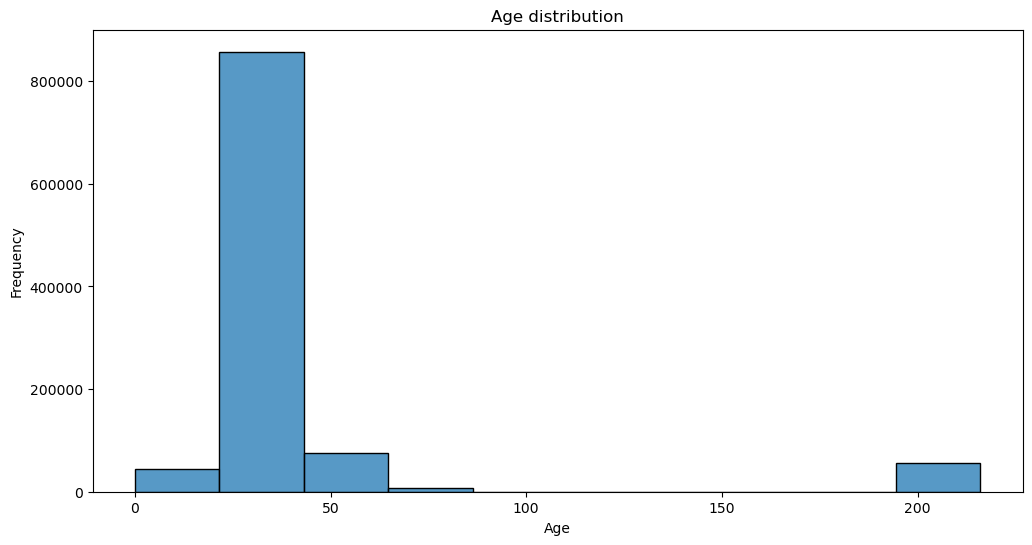

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 6))
sns.histplot(df["Age"], bins = 10, kde = False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()

In [14]:
df[df["Age"] > 100]["CustomerDOB"].unique()

array(['1800-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [15]:
# define function to fix outliers

def replace_age_outlier(df):
    DOB_threshold = 1900
    # Find the outlier indexes where the DOB year is less than the threshold
    age_outliers = df[df["CustomerDOB"].dt.year < DOB_threshold].index
    
    # Replace outliers with the mean of the remaining "CustomerDOB"
    mean_DOB = df[~df.index.isin(age_outliers)]["CustomerDOB"].mean()
    
    # Replace the outliers with the mean DOB
    df.loc[age_outliers, "CustomerDOB"] = mean_DOB
    return df


In [16]:
df = replace_age_outlier(df)
df = calculate_age(df)

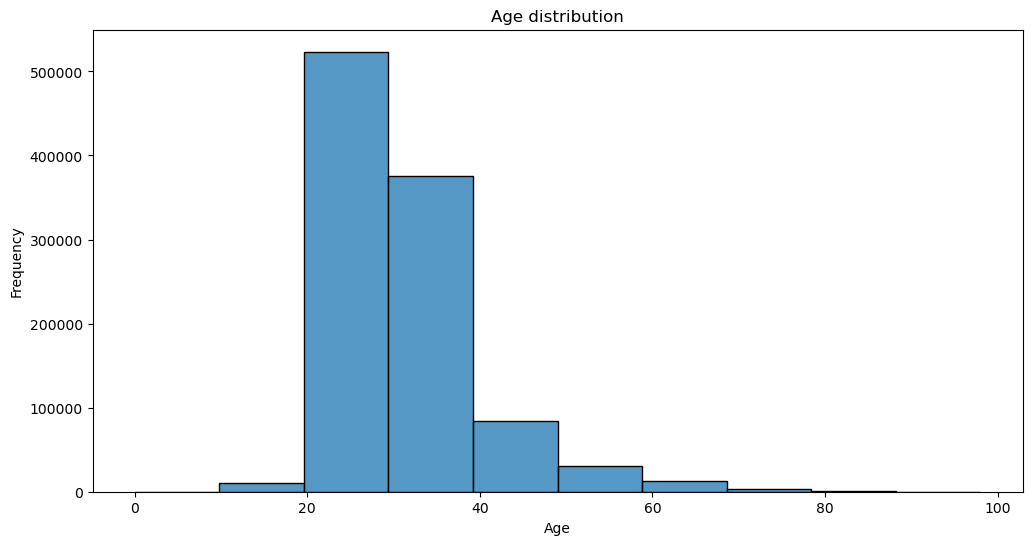

In [17]:
plt.figure(figsize = (12, 6))
sns.histplot(df["Age"], bins = 10, kde = False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age distribution")
plt.show()

In [18]:
### Access the Gender column

In [19]:
df["CustGender"].value_counts()

M    760978
F    280635
T         1
Name: CustGender, dtype: int64

In [20]:
df["CustGender"] = df["CustGender"].replace("T", "M")
df["CustGender"].value_counts()

M    760979
F    280635
Name: CustGender, dtype: int64

### Location

In [21]:
df["CustLocation"].value_counts()

MUMBAI                            101997
NEW DELHI                          84143
BANGALORE                          81330
GURGAON                            73594
DELHI                              70549
                                   ...  
DISTRICT PURI                          1
DHAKOLA                                1
KANDESHWAR STATION NAVI MUMBAI         1
HOSHIAR PUR                            1
IMPERIA THANE WEST                     1
Name: CustLocation, Length: 9275, dtype: int64

### Account Balance

In [22]:
df["CustAccountBalance"].sort_values(ascending = True)

133809             0.0
1017262            0.0
665191             0.0
631012             0.0
242176             0.0
              ...     
995329     115035495.1
40727      115035495.1
994478     115035495.1
829903     115035495.1
873636     115035495.1
Name: CustAccountBalance, Length: 1041614, dtype: float64

### Transaction Amount

In [26]:
# thius shows amount of customers with zero transactions
df[df["TransactionAmount (INR)"] == 0].value_counts().sum()

820

In [29]:
#drop columns with zero amount of transaction
df.drop(df[df["TransactionAmount (INR)"] == 0].index.tolist(), axis = 0, inplace = True)
df[df["TransactionAmount (INR)"] == 0].value_counts().sum()

0

In [31]:
# visualize our data again
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


### Exploratory Data Analysis

In [32]:
df["CustomerID"].nunique()

878763

In [33]:
df.shape

(1040794, 10)

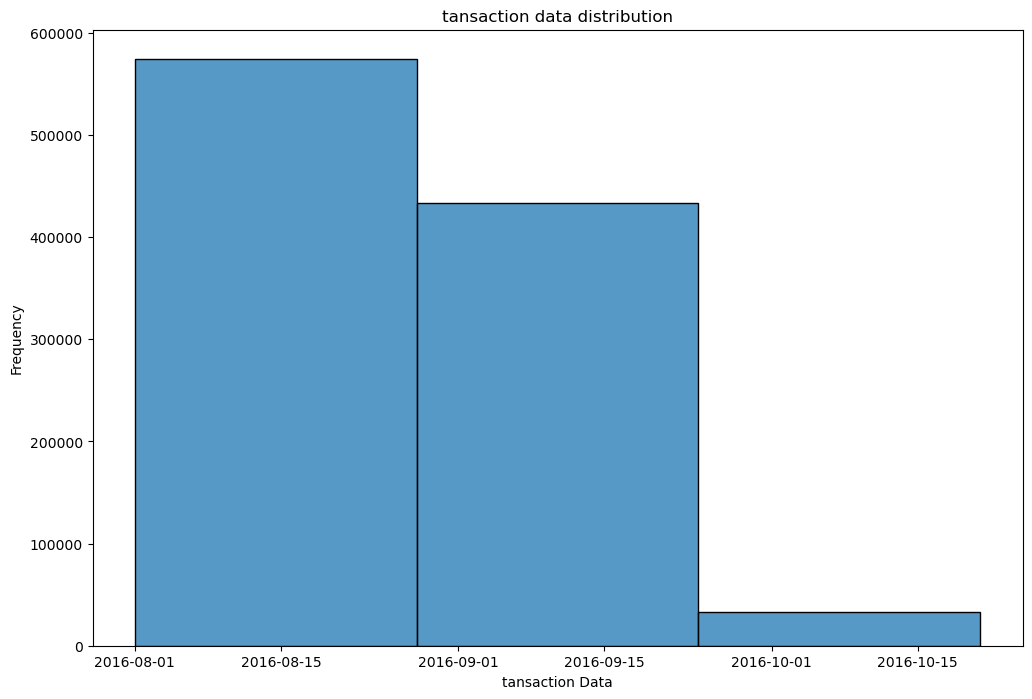

In [35]:
# plot a distribution for data across the unique transactionh date 
plt.figure(figsize = (12, 8))
sns.histplot(df["TransactionDate"], bins = 3, kde = False)
plt.xlabel("tansaction Data")
plt.ylabel("Frequency")
plt.title("tansaction data distribution")
plt.show()

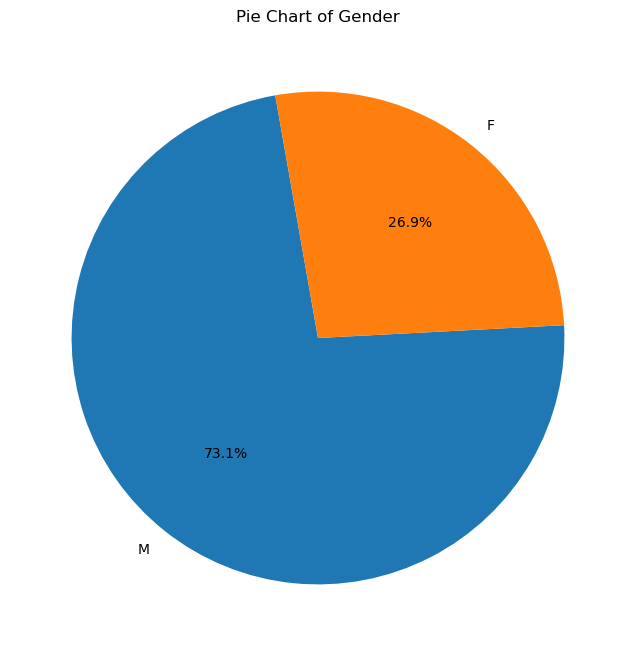

In [37]:
# Create a pie chat
plt.figure(figsize = (8, 8))
gender_count = df["CustGender"].value_counts()
plt.pie(gender_count, labels = gender_count.index, autopct = "%1.1f%%", startangle = 100)
plt.title("Pie Chart of Gender")
plt.show()

### Recency Frequency and Monetary (RFM) Analysis

In [39]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-08-02,143207,25.0,22
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-08-02,141858,27999.0,59
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-08-02,142712,459.0,20
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-08-02,142714,2060.0,43
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02,181156,1762.5,28


### Recency
We want to see how recent a customer is.

In [41]:
day = df["TransactionDate"].max()
day

Timestamp('2016-10-21 00:00:00')

In [42]:
recency = df.groupby(["CustomerID"]).agg({"TransactionDate": lambda x: ((day - x.max()).days) + 1})
recency.head()

,TransactionDate
CustomerID,
C1010011,26
C1010012,69
C1010014,76
C1010018,37
C1010024,65


### Frequency

In [44]:
frequency = df.drop_duplicates(subset = "TransactionID").groupby(["CustomerID"])[["TransactionID"]].count()
frequency.head()

,TransactionID
CustomerID,
C1010011,2
C1010012,1
C1010014,2
C1010018,1
C1010024,1


### Monetary

In [46]:
monetary = df.groupby("CustomerID")[["TransactionAmount (INR)"]].sum()
monetary.head()

,TransactionAmount (INR)
CustomerID,
C1010011,5106.0
C1010012,1499.0
C1010014,1455.0
C1010018,30.0
C1010024,5000.0


### Creat RFM Table
By concatenating all the individual tabel that has just been created

In [47]:
RFM_table = pd.concat([recency, frequency, monetary], axis = 1)
RFM_table.head()

,TransactionDate,TransactionID,TransactionAmount (INR)
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


In [49]:
# Change the column name
RFM_table = RFM_table.rename(columns = {"TransactionDate": "recency", "TransactionID": "frequency", "TransactionAmount (INR)": "monetary"})
RFM_table.head()

,recency,frequency,monetary
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


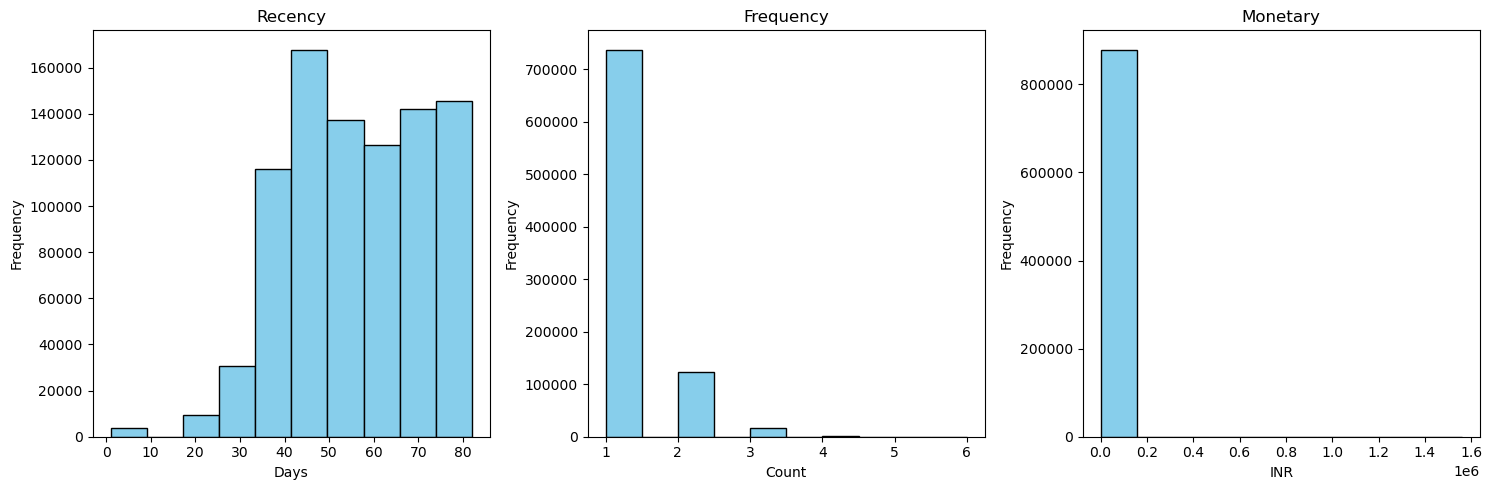

In [54]:
# Exploring the RFM table
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
columns = ["recency", "frequency", "monetary"]

for i, col in enumerate(columns):
    axes[i].hist(RFM_table[col], bins=10, color="skyblue", edgecolor="black")
    axes[i].set_title(col.capitalize())
    axes[i].set_xlabel("Days" if col == "recency" else "Count" if col == "frequency" else "INR")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

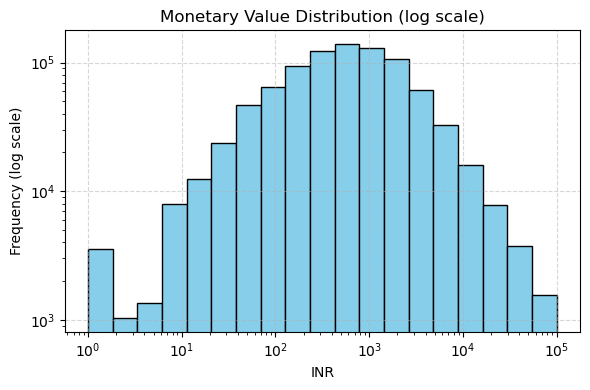

In [58]:
# Visualize the monetary foir clear view by using the logspace function in numpy
plt.figure(figsize=(6, 4))
plt.hist(RFM_table["monetary"], bins= np.logspace(0, 5, 20), color="skyblue", edgecolor="black")
plt.title("Monetary Value Distribution (log scale)")
plt.xlabel("INR")
plt.ylabel("Frequency (log scale)")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [60]:
# Check for correlation
RFM_table.corr()

,recency,frequency,monetary
recency,1.000000,-0.223293,-0.020675
frequency,-0.223293,1.000000,0.097491
monetary,-0.020675,0.097491,1.000000


### Assign RFM Score

In [61]:
RFM_table.head()

,recency,frequency,monetary
CustomerID,,,
C1010011,26,2,5106.0
C1010012,69,1,1499.0
C1010014,76,2,1455.0
C1010018,37,1,30.0
C1010024,65,1,5000.0


In [90]:
# calculate the quatile for each score
quantile = RFM_table[["recency", "frequency", "monetary"]].quantile(q = [0.25, 0.5, 0.75]).to_dict()
quantile

{'recency': {0.25: 44.0, 0.5: 56.0, 0.75: 69.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary': {0.25: 200.0, 0.5: 534.0, 0.75: 1500.0}}

In [91]:
RFM_table["frequency"].value_counts()

1    736989
2    123500
3     16460
4      1659
5       141
6        14
Name: frequency, dtype: int64

In [92]:
def assign_R_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 4
    elif x <= quantile[feature][0.50]:
        return 3
    elif x <= quantile[feature][0.75]:
        return 2
    else:
        return 1

def assign_M_score(x, feature):
    if x <= quantile[feature][0.25]:
        return 1
    elif x <= quantile[feature][0.50]:
        return 2
    elif x <= quantile[feature][0.75]:
        return 3
    else:
        return 4

In [93]:
def customer_frequency_score(x):
    if x <= 3:
        return x
    else:
        return 4

In [96]:
RFM_table["R_score"] = RFM_table["recency"].apply(lambda x: assign_R_score(x, "recency"))
RFM_table["F_score"] = RFM_table["frequency"].apply(customer_frequency_score)
RFM_table["M_score"] = RFM_table["monetary"].apply(lambda x: assign_M_score(x, "monetary"))

In [97]:
RFM_table

,recency,frequency,monetary,R_score,F_score,M_score
CustomerID,,,,,,
C1010011,26,2,5106.0,4,2,4
C1010012,69,1,1499.0,2,1,3
C1010014,76,2,1455.0,1,2,3
C1010018,37,1,30.0,4,1,1
C1010024,65,1,5000.0,2,1,4
...,...,...,...,...,...,...
C9099836,76,1,691.0,1,1,3
C9099877,37,1,222.0,4,1,2
C9099919,65,1,126.0,2,1,1


In [98]:
# Create total RFM Score
RFM_table["RFM_score"] = RFM_table[["R_score", "M_score", "F_score"]].sum(axis = 1)
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
C1010011,26,2,5106.0,4,2,4,10
C1010012,69,1,1499.0,2,1,3,6
C1010014,76,2,1455.0,1,2,3,6
C1010018,37,1,30.0,4,1,1,6
C1010024,65,1,5000.0,2,1,4,7


In [99]:
# Create RFM Grou
RFM_table["RFM_group"] = RFM_table["R_score"].astype(str) + RFM_table["F_score"].astype(str) + RFM_table["M_score"].astype(str)
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group
CustomerID,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424
C1010012,69,1,1499.0,2,1,3,6,213
C1010014,76,2,1455.0,1,2,3,6,123
C1010018,37,1,30.0,4,1,1,6,411
C1010024,65,1,5000.0,2,1,4,7,214


<AxesSubplot:xlabel='RFM_score', ylabel='count'>

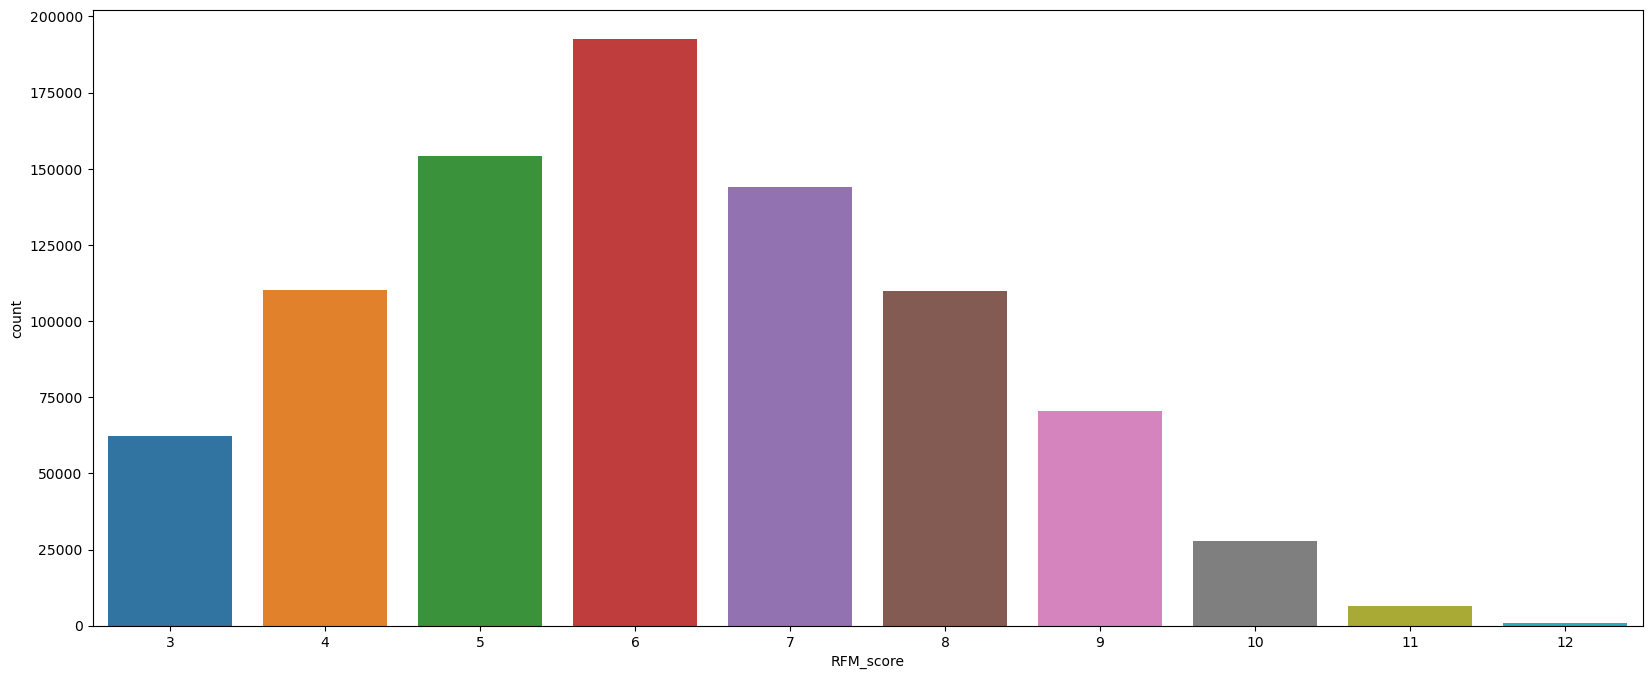

In [100]:
# Visualize RFM Score
plt.figure(figsize = (20, 8))
sns.countplot(x = RFM_table["RFM_score"])

**12 - 10** for high valued customers
**9 - 6** for medium valued customers
**5 - 3** for low valued customers

In [103]:
def assign_segments(x):
    if x <= 5:
        return "low"
    elif x <= 9:
        return "medium"
    else:
        return "high"

In [105]:
RFM_table["segments"] = RFM_table["RFM_score"].apply(lambda x: assign_segments(x))
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group,segments
CustomerID,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high
C1010012,69,1,1499.0,2,1,3,6,213,medium
C1010014,76,2,1455.0,1,2,3,6,123,medium
C1010018,37,1,30.0,4,1,1,6,411,medium
C1010024,65,1,5000.0,2,1,4,7,214,medium


<AxesSubplot:xlabel='segments', ylabel='count'>

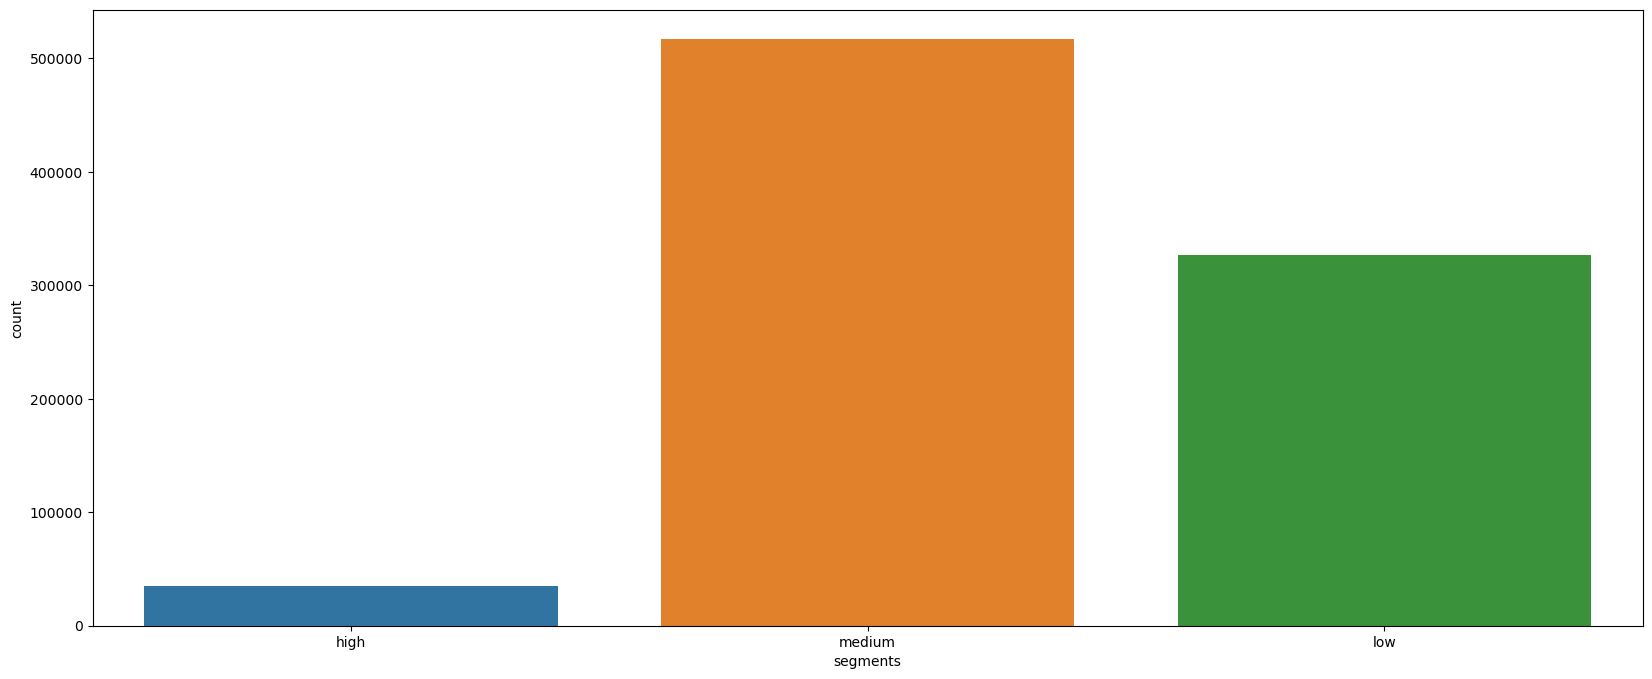

In [107]:
# Visualize RFM segments
plt.figure(figsize = (20, 8))
sns.countplot(x = RFM_table["segments"])

### Create weighted RFM Score

In [108]:
RFM_table["weighted score"] = (RFM_table["R_score"] * 2) + (RFM_table["F_score"] * 1) + (RFM_table["M_score"] * 1)
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group,segments,weighted score
CustomerID,,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high,14
C1010012,69,1,1499.0,2,1,3,6,213,medium,8
C1010014,76,2,1455.0,1,2,3,6,123,medium,7
C1010018,37,1,30.0,4,1,1,6,411,medium,10
C1010024,65,1,5000.0,2,1,4,7,214,medium,9


<AxesSubplot:xlabel='weighted score', ylabel='count'>

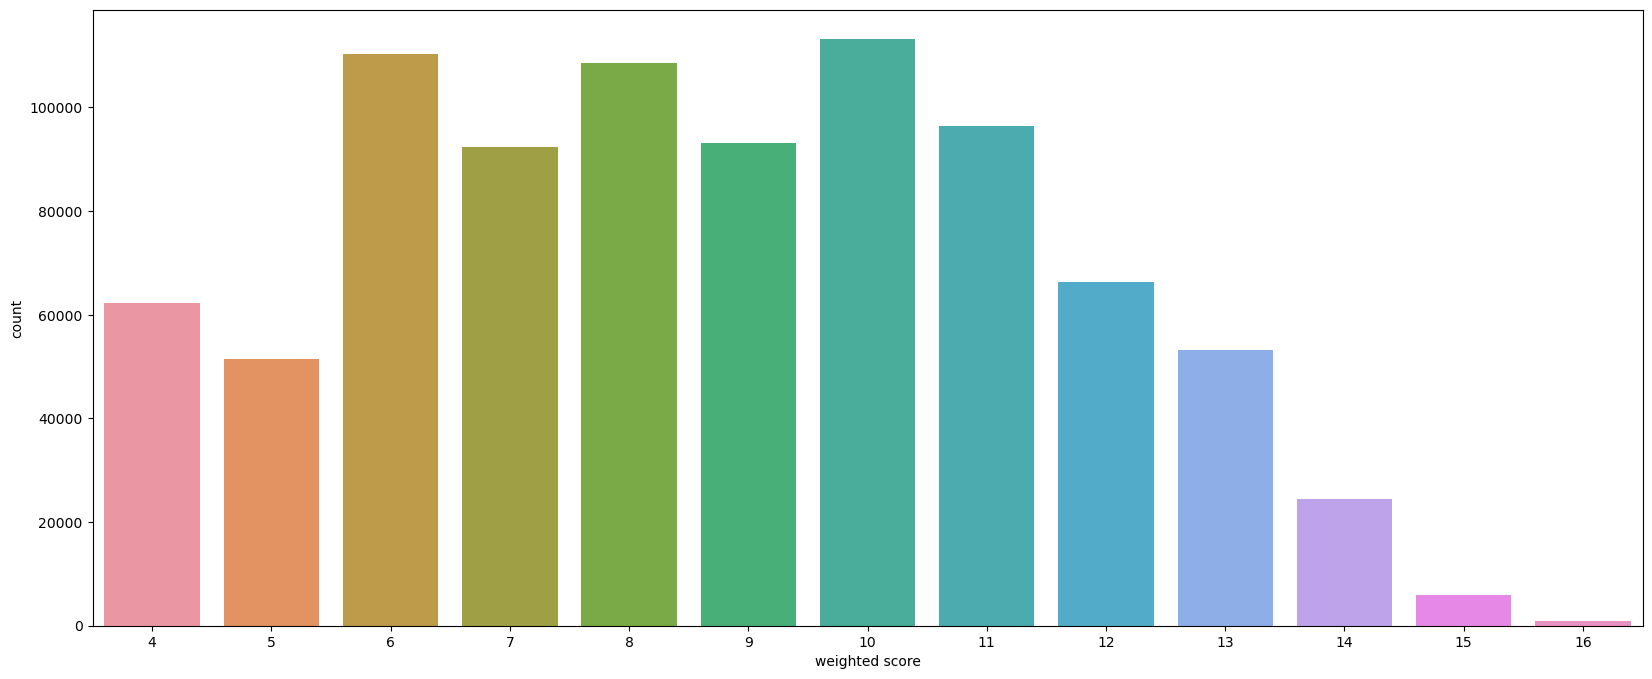

In [109]:
# Visualize RFM segments
plt.figure(figsize = (20, 8))
sns.countplot(x = RFM_table["weighted score"])

In [110]:
RFM_table["weighted segments"] = RFM_table["weighted score"].apply(lambda x: assign_segments(x))
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group,segments,weighted score,weighted segments
CustomerID,,,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high,14,high
C1010012,69,1,1499.0,2,1,3,6,213,medium,8,medium
C1010014,76,2,1455.0,1,2,3,6,123,medium,7,medium
C1010018,37,1,30.0,4,1,1,6,411,medium,10,high
C1010024,65,1,5000.0,2,1,4,7,214,medium,9,medium


<AxesSubplot:xlabel='weighted segments', ylabel='count'>

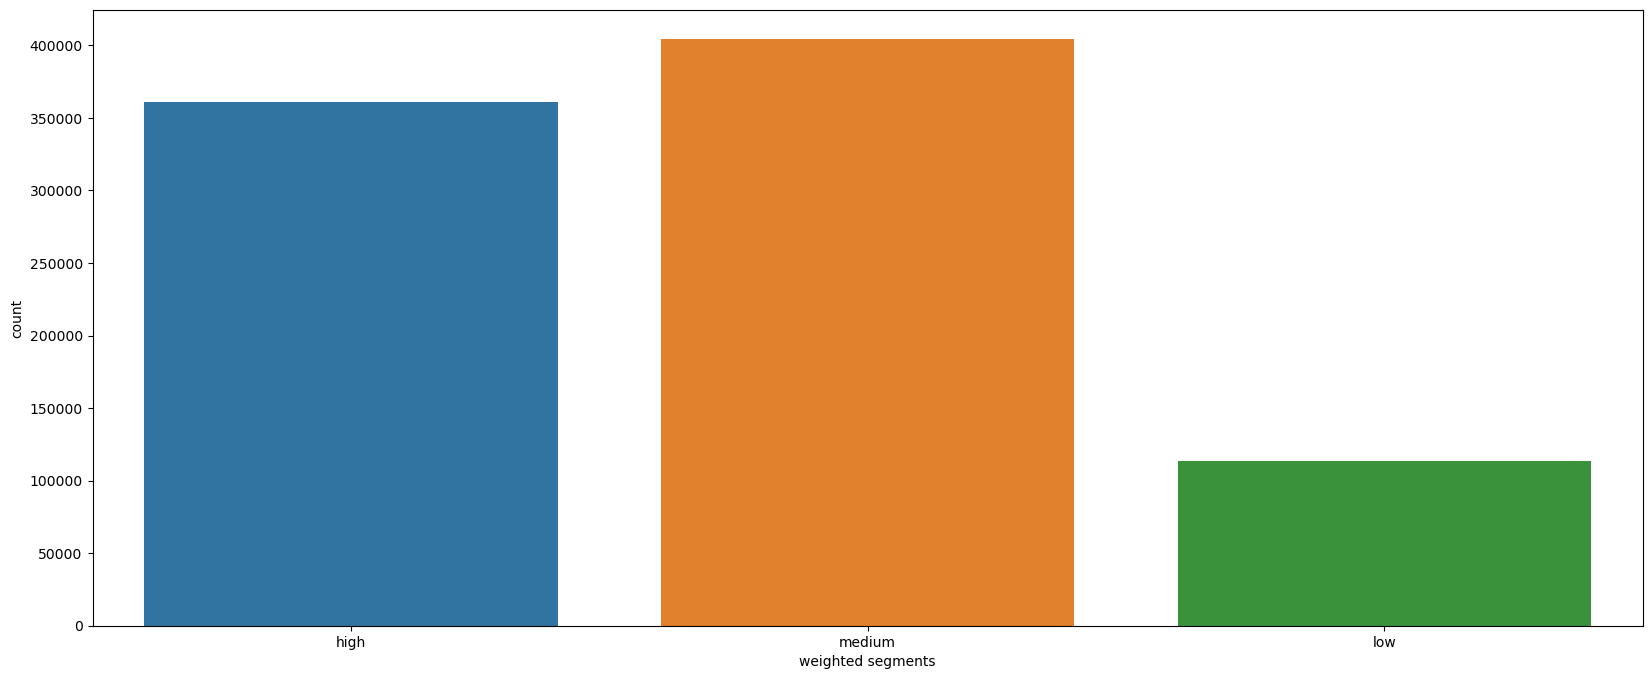

In [112]:
# Visualize RFM segments
plt.figure(figsize = (20, 8))
sns.countplot(x = RFM_table["weighted segments"])

### Customer Segmentation with K-Means(Unsupervised Learning)
import Libraries

In [115]:
! pip install yellowbrick
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

     -------------------------------------- 282.6/282.6 kB 8.5 MB/s eta 0:00:00


### Create DataFrame for clustrering algorithm

In [117]:
RFM_data = RFM_table.drop(["RFM_group", "segments", "weighted score", "weighted segments"], axis = 1)
RFM_data.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score
CustomerID,,,,,,,
C1010011,26,2,5106.0,4,2,4,10
C1010012,69,1,1499.0,2,1,3,6
C1010014,76,2,1455.0,1,2,3,6
C1010018,37,1,30.0,4,1,1,6
C1010024,65,1,5000.0,2,1,4,7


**Scale DataFrame**

In [120]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(RFM_data)
scaled_data

array([[-1.99039095,  1.8173276 ,  0.45193522, ...,  1.82368347,
         1.34172808,  2.0708205 ],
       [ 0.83352617, -0.41084172, -0.04969314, ..., -0.41175149,
         0.45881674, -0.10052404],
       [ 1.2932336 ,  1.8173276 , -0.05581225, ...,  1.82368347,
         0.45881674, -0.10052404],
       ...,
       [ 0.5708362 , -0.41084172, -0.24063734, ..., -0.41175149,
        -1.30700594, -1.18619632],
       [-0.08588871, -0.41084172, -0.25120672, ..., -0.41175149,
        -1.30700594, -0.64336018],
       [-1.92471846, -0.41084172, -0.13925473, ..., -0.41175149,
         0.45881674,  0.98514823]])

### Implement Clustering algorithm

In [121]:
model = KMeans(random_state = 1)

### Using the distortion Metric

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=9, random_state=1), k=(2, 10))

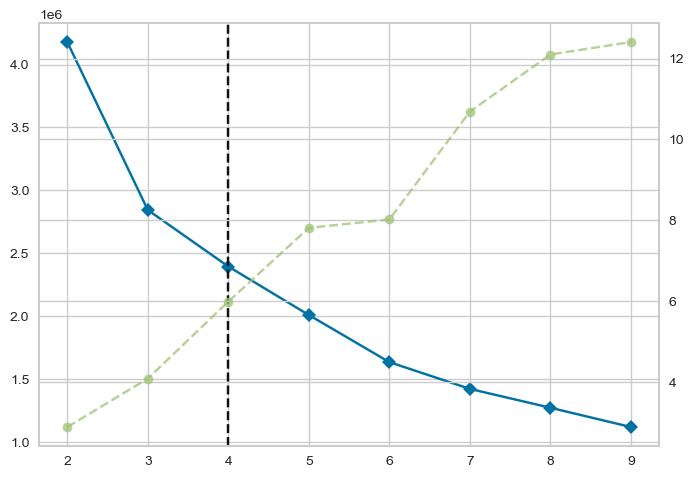

In [123]:
plot_model = KElbowVisualizer(model, k = (2,10), metric = "distortion", timing = False)
plot_model.fit(scaled_data)

**Using calinski harrabasz metric**

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=9, random_state=1), k=(2, 10),
                 metric='calinski_harabasz')

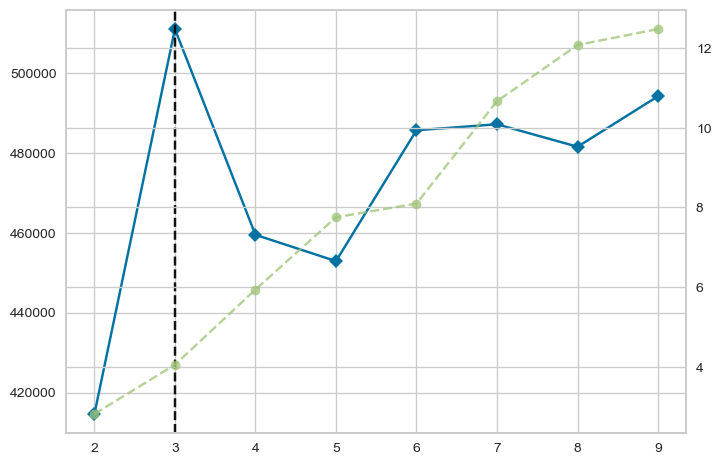

In [125]:
plot_model = KElbowVisualizer(model, k = (2,10), metric = "calinski_harabasz", timing = False)
plot_model.fit(scaled_data)

### Cluster assignment

In [129]:
final_model = KMeans(random_state = 1, n_clusters = 3)
final_model.fit(scaled_data)

KMeans(n_clusters=3, random_state=1)

In [131]:
cluster_assignment = final_model.labels_
cluster_assignment

array([2, 0, 2, ..., 0, 1, 1])

In [132]:
RFM_data["Cluster"] = cluster_assignment
RFM_data

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,Cluster
CustomerID,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,2
C1010012,69,1,1499.0,2,1,3,6,0
C1010014,76,2,1455.0,1,2,3,6,2
C1010018,37,1,30.0,4,1,1,6,1
C1010024,65,1,5000.0,2,1,4,7,0
...,...,...,...,...,...,...,...,...
C9099836,76,1,691.0,1,1,3,5,0
C9099877,37,1,222.0,4,1,2,7,1
C9099919,65,1,126.0,2,1,1,4,0


### Visualise how clustered are spread out

<AxesSubplot:xlabel='recency', ylabel='monetary'>

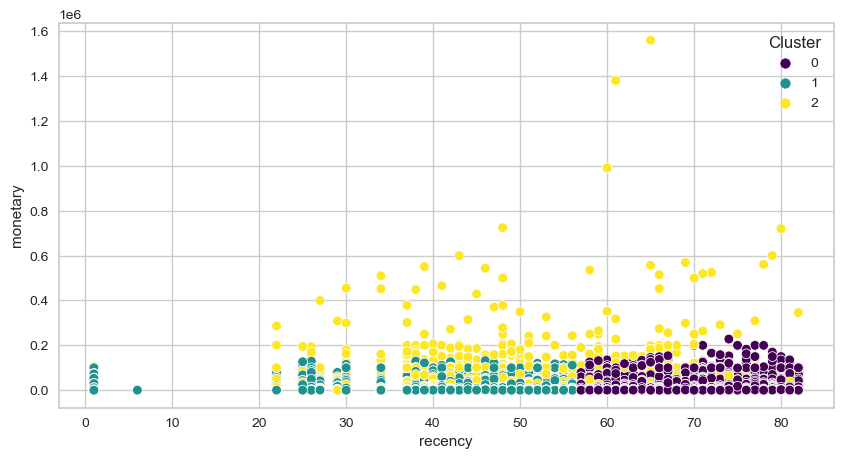

In [138]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = RFM_data, x = RFM_data["recency"], y = RFM_data["monetary"], hue = RFM_data["Cluster"], palette = "viridis")
           

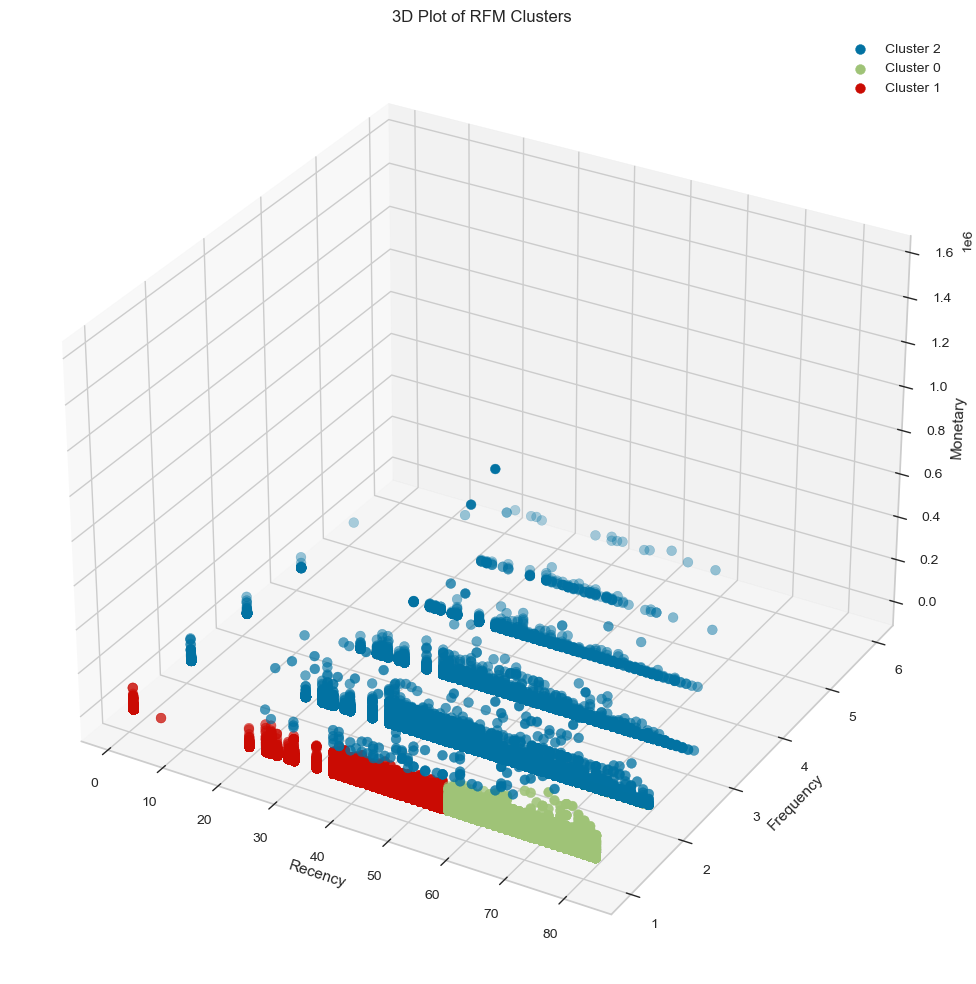

In [142]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['b', 'g', 'r']  # Add more if you have more clusters

for cluster, color in zip(RFM_data["Cluster"].unique(), colors):
    cluster_data = RFM_data[RFM_data["Cluster"] == cluster]
    ax.scatter(
        cluster_data["recency"],
        cluster_data["frequency"],
        cluster_data["monetary"],
        c=color,
        s=50,
        marker='o',
        label=f"Cluster {cluster}"
    )

ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
ax.legend()
plt.title("3D Plot of RFM Clusters")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Cluster', ylabel='count'>

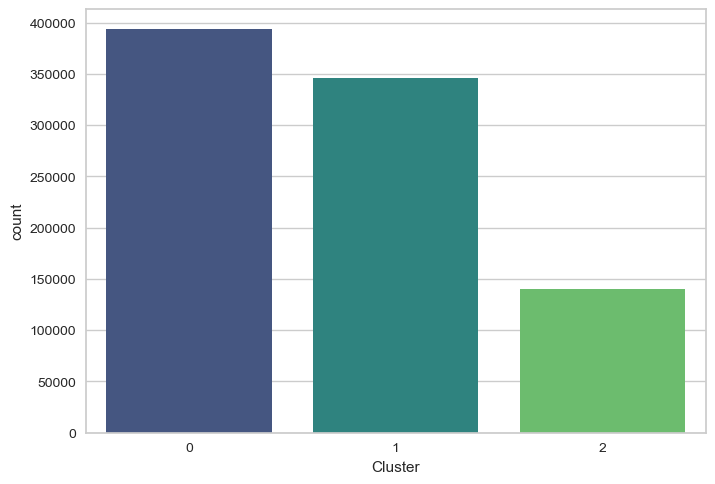

In [143]:
sns.countplot(x = RFM_data["Cluster"], palette = "viridis")

In [144]:
for cluster in RFM_data["Cluster"].unique():
    print(f"cluster: {cluster}")
    print(RFM_data[RFM_data["Cluster"] == cluster].describe())

cluster: 2
             recency      frequency      monetary        R_score  \
count  139814.000000  139814.000000  1.398140e+05  139814.000000   
mean       48.224577       2.144084  3.621687e+03       3.108165   
std        12.905761       0.394856  1.351224e+04       0.916134   
min         1.000000       1.000000  2.000000e+00       1.000000   
25%        40.000000       2.000000  6.793775e+02       2.000000   
50%        47.000000       2.000000  1.450000e+03       3.000000   
75%        57.000000       2.000000  3.076015e+03       4.000000   
max        82.000000       6.000000  1.560035e+06       4.000000   

             F_score        M_score      RFM_score   Cluster  
count  139814.000000  139814.000000  139814.000000  139814.0  
mean        2.142876       3.257285       8.508325       2.0  
std         0.387317       0.860861       1.359920       0.0  
min         1.000000       1.000000       5.000000       2.0  
25%         2.000000       3.000000       8.000000       2.0 

In [145]:
cluster_0 = RFM_data[RFM_data["Cluster"] == 0]
cluster_1 = RFM_data[RFM_data["Cluster"] == 1]
cluster_2 = RFM_data[RFM_data["Cluster"] == 2]

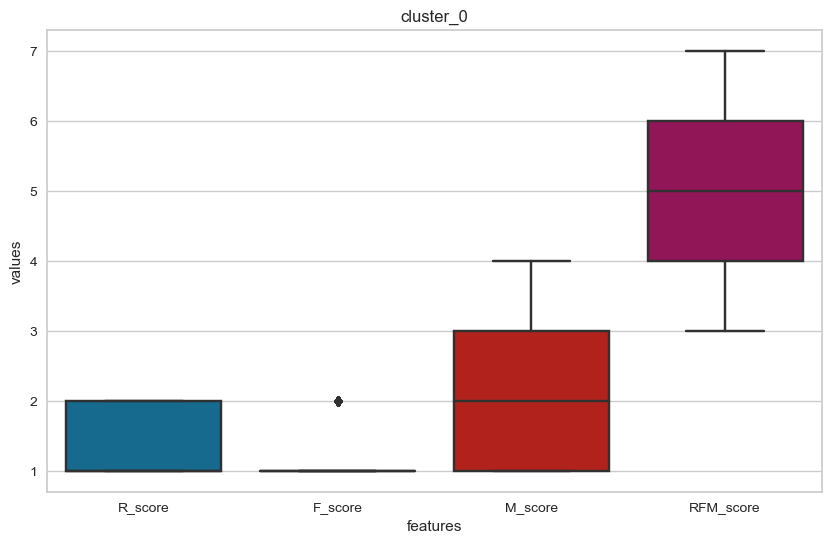

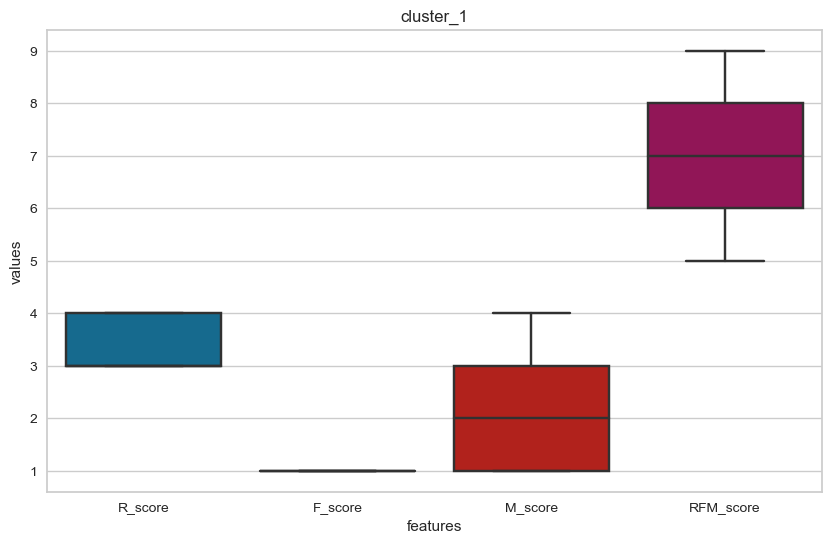

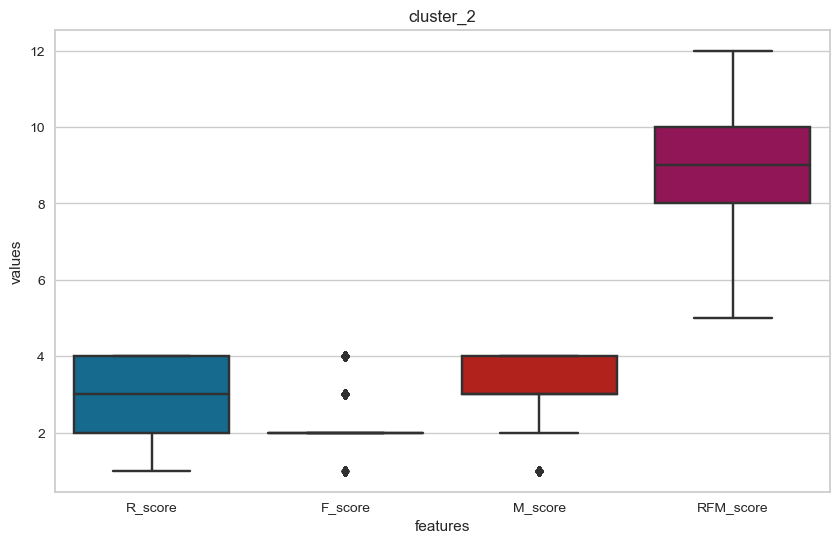

In [147]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = cluster_0[["R_score", "F_score", "M_score", "RFM_score"]])
plt.title(f"cluster_0")
plt.ylabel("values")
plt.xlabel("features")
plt.show()

plt.figure(figsize = (10, 6))
sns.boxplot(data = cluster_1[["R_score", "F_score", "M_score", "RFM_score"]])
plt.title(f"cluster_1")
plt.ylabel("values")
plt.xlabel("features")
plt.show()

plt.figure(figsize = (10, 6))
sns.boxplot(data = cluster_2[["R_score", "F_score", "M_score", "RFM_score"]])
plt.title(f"cluster_2")
plt.ylabel("values")
plt.xlabel("features")
plt.show()

### Interpreteation

**cluster_0**

1. R_score (Recency score):
   * Median is approximately 2, with a lower quartile of 1 and an upper quartile of 2.
   * This indicates that the majority of customers in this cluster made their most recent purchase a relatively long time ago (lower scores imply higher recency).

2. F_score (Frequency score):
   * Both the median and interquartile range are around 1, with a single mild outlier at 2.
   * This suggests that customers in cluster_0 made very few purchases historically, with minimal variation in transaction frequency.

3. M_score (Monetary score):
   * Shows more dispersion with a median around 2, and an interquartile range between 1 and 3.
   * This implies a moderate variation in spending behavior, although the majority of this cluster consists of low to moderately valuable customers.

4. RFM_score (aggregate RFM index):
   * Displays the highest median (approximately 5), with values ranging between 3 and 7.
   * Despite low individual F and R scores, the relatively higher RFM score may be influenced by the monetary component or scoring algorithm, indicating moderate overall value when the three metrics are combined.
   
**Conclusion**
* Cluster_0 consists predominantly of low-frequency and low-recency customers with moderate monetary value. The high RFM_score despite low F and R scores may suggest that certain monetary transactions within this cluster are significant enough to elevate their overall ranking. This cluster might represent infrequent but high-spending customers or one-time buyers with large purchases. Marketing strategies for this group could focus on reactivation through targeted offers, emphasizing value or loyalty incentives to encourage repeat engagement.

**cluster_1**
* R_score (Recency): Median ~3–4, indicating moderately recent activity.
* F_score (Frequency): Very low (mostly 1), meaning these customers rarely purchase.
* M_score (Monetary): Low to moderate spending.
* RFM_score: Relatively high (median ~7), likely driven by good recency and monetary value.

**Conclusion**
* Customers in cluster_1 buy infrequently but have recent and moderately valuable transactions. They may be newly acquired or occasional high-spenders worth nurturing.

**cluster_2**
* R_score: Moderate recency (median ~3).
* F_score: Low frequency (mostly 2).
* M_score: Moderate spending.
* RFM_score: High overall (median ~9), indicating strong value.

**Conclusion**
* These are valuable customers with decent recency and spend, but low purchase frequency — ideal for loyalty or upsell campaigns.

In [148]:
RFM_data.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,Cluster
CustomerID,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,2
C1010012,69,1,1499.0,2,1,3,6,0
C1010014,76,2,1455.0,1,2,3,6,2
C1010018,37,1,30.0,4,1,1,6,1
C1010024,65,1,5000.0,2,1,4,7,0


In [149]:
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,RFM_score,RFM_group,segments,weighted score,weighted segments
CustomerID,,,,,,,,,,,
C1010011,26,2,5106.0,4,2,4,10,424,high,14,high
C1010012,69,1,1499.0,2,1,3,6,213,medium,8,medium
C1010014,76,2,1455.0,1,2,3,6,123,medium,7,medium
C1010018,37,1,30.0,4,1,1,6,411,medium,10,high
C1010024,65,1,5000.0,2,1,4,7,214,medium,9,medium


In [150]:
RFM_table.to_csv("RFM_table.csv", index = False)

In [ ]:
RFM_data.to_csv("RFM_t.csv", index = False)